# 🧬 Protein Dataset Analysis - Interactive Notebook

*Comprehensive exploratory data analysis of protein dataset*

**Generated on:** August 21, 2025

This notebook provides an interactive analysis of the protein dataset including:
- Dataset summary and structure
- Basic statistics and distributions  
- Data quality assessment
- Interactive visualizations
- Key insights and findings

## 📚 Import Libraries

First, let's import all the necessary libraries for our analysis.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Additional utilities
from collections import Counter
import warnings

# Configure display and warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📊 Data Loading

Let's load our protein dataset and take a first look at the data structure.

In [2]:
# Load the protein dataset
print("🔄 Loading protein dataset...")
df = pd.read_csv('../data/proteins.tsv', sep='\t')

print(f"✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

🔄 Loading protein dataset...
✅ Data loaded successfully!
📊 Dataset shape: 2,000 rows × 5 columns
💾 Memory usage: 0.96 MB


## 2️⃣ Dataset Summary

### Basic Dataset Information

In [5]:
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"📊 Number of rows: {len(df):,}")
print(f"📊 Number of columns: {len(df.columns)}")
print(f"📊 Total data points: {df.size:,}")

print("\n📋 Column Information:")
print("-" * 50)

for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    non_null = df[col].notna().sum()
    missing = len(df) - non_null
    completeness = (non_null / len(df)) * 100
    
    print(f"{i}. {col}")
    print(f"   📊 Data type: {dtype}")
    print(f"   ✅ Complete: {non_null:,} ({completeness:.1f}%)")
    print(f"   ❌ Missing: {missing:,}")
    print()

📋 DATASET OVERVIEW
📊 Number of rows: 2,000
📊 Number of columns: 5
📊 Total data points: 10,000

📋 Column Information:
--------------------------------------------------
1. Entry
   📊 Data type: object
   ✅ Complete: 2,000 (100.0%)
   ❌ Missing: 0

2. Length
   📊 Data type: int64
   ✅ Complete: 2,000 (100.0%)
   ❌ Missing: 0

3. EC number
   📊 Data type: object
   ✅ Complete: 1,144 (57.2%)
   ❌ Missing: 856

4. Keywords
   📊 Data type: object
   ✅ Complete: 2,000 (100.0%)
   ❌ Missing: 0

5. Gene Ontology (molecular function)
   📊 Data type: object
   ✅ Complete: 1,843 (92.2%)
   ❌ Missing: 157



### Data Types and Structure

In [6]:
# Display data types and basic info
print("📊 Data Types and Info:")
df.info()

print("\n📊 Data Description:")
df.describe(include='all')

📊 Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Entry                               2000 non-null   object
 1   Length                              2000 non-null   int64 
 2   EC number                           1144 non-null   object
 3   Keywords                            2000 non-null   object
 4   Gene Ontology (molecular function)  1843 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB

📊 Data Description:


,Entry,Length,EC number,Keywords,Gene Ontology (molecular function)
count,2000,2000.000000,1144,2000,1843
unique,2000,NaN,610,1719,1385
top,A0A009IHW8,NaN,2.7.11.1,Alternative splicing;Disulfide bond;Glycoprote...,3-hydroxybutyryl-CoA epimerase activity [GO:00...
freq,1,NaN,43,10,17
mean,NaN,542.123000,NaN,NaN,NaN
std,NaN,308.293721,NaN,NaN,NaN
min,NaN,50.000000,NaN,NaN,NaN
25%,NaN,322.000000,NaN,NaN,NaN
50%,NaN,478.000000,NaN,NaN,NaN
75%,NaN,718.000000,NaN,NaN,NaN


### Sample Data Preview

In [7]:
print("👀 First 5 rows of the dataset:")
print("=" * 80)

# Display sample with better formatting
sample = df.head()
for idx, row in sample.iterrows():
    print(f"\n🔹 Row {idx + 1}:")
    for col in df.columns:
        value = str(row[col])
        if len(value) > 80:
            value = value[:80] + "..."
        print(f"   {col}: {value}")
    print("-" * 80)

👀 First 5 rows of the dataset:

🔹 Row 1:
   Entry: A0A009IHW8
   Length: 269
   EC number: 3.2.2.-; 3.2.2.6
   Keywords: 3D-structure;Coiled coil;Hydrolase;NAD
   Gene Ontology (molecular function): NAD+ nucleosidase activity [GO:0003953]; NAD+ nucleosidase activity, cyclic ADP-...
--------------------------------------------------------------------------------

🔹 Row 2:
   Entry: A0A023I7E1
   Length: 796
   EC number: 3.2.1.39
   Keywords: 3D-structure;Carbohydrate metabolism;Cell wall;Cell wall biogenesis/degradation;...
   Gene Ontology (molecular function): endo-1,3(4)-beta-glucanase activity [GO:0052861]; glucan endo-1,3-beta-D-glucosi...
--------------------------------------------------------------------------------

🔹 Row 3:
   Entry: A0A024RXP8
   Length: 514
   EC number: 3.2.1.91
   Keywords: Carbohydrate metabolism;Cellulose degradation;Disulfide bond;Glycoprotein;Glycos...
   Gene Ontology (molecular function): cellulose 1,4-beta-cellobiosidase activity [GO:0016162]; cell

In [8]:
# Alternative cleaner display
print("📋 Sample data (tabular view):")
df.head()

📋 Sample data (tabular view):


,Entry,Length,EC number,Keywords,Gene Ontology (molecular function)
0,A0A009IHW8,269,3.2.2.-; 3.2.2.6,3D-structure;Coiled coil;Hydrolase;NAD,NAD+ nucleosidase activity [GO:0003953]; NAD+ ...
1,A0A023I7E1,796,3.2.1.39,3D-structure;Carbohydrate metabolism;Cell wall...,"endo-1,3(4)-beta-glucanase activity [GO:005286..."
2,A0A024RXP8,514,3.2.1.91,Carbohydrate metabolism;Cellulose degradation;...,"cellulose 1,4-beta-cellobiosidase activity [GO..."
3,A0A024SC78,248,3.1.1.74,3D-structure;Disulfide bond;Hydrolase;Secreted...,cutinase activity [GO:0050525]
4,A0A024SH76,471,3.2.1.91,Carbohydrate metabolism;Cellulose degradation;...,"cellulose 1,4-beta-cellobiosidase activity [GO..."


## 3️⃣ Basic Statistics

### Protein Length Analysis

In [9]:
# Focus on Length column as the main numerical feature
length_col = df['Length']

print("📈 PROTEIN LENGTH STATISTICS")
print("=" * 50)
print(f"📊 Mean: {length_col.mean():.2f} amino acids")
print(f"📊 Median: {length_col.median():.2f} amino acids")
print(f"📊 Mode: {length_col.mode().iloc[0]:.0f} amino acids")
print(f"📊 Minimum: {length_col.min():.0f} amino acids")
print(f"📊 Maximum: {length_col.max():.0f} amino acids")
print(f"📊 Range: {length_col.max() - length_col.min():.0f} amino acids")
print(f"📊 Standard Deviation: {length_col.std():.2f}")
print(f"📊 Variance: {length_col.var():.2f}")

print("\n📊 Percentiles:")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = length_col.quantile(p/100)
    print(f"   {p}th percentile: {value:.2f} amino acids")

📈 PROTEIN LENGTH STATISTICS
📊 Mean: 542.12 amino acids
📊 Median: 478.00 amino acids
📊 Mode: 283 amino acids
📊 Minimum: 50 amino acids
📊 Maximum: 1488 amino acids
📊 Range: 1438 amino acids
📊 Standard Deviation: 308.29
📊 Variance: 95045.02

📊 Percentiles:
   10th percentile: 196.80 amino acids
   25th percentile: 322.00 amino acids
   50th percentile: 478.00 amino acids
   75th percentile: 718.00 amino acids
   90th percentile: 975.20 amino acids
   95th percentile: 1183.10 amino acids
   99th percentile: 1446.02 amino acids


### Categorical Data Analysis

In [10]:
print("📊 CATEGORICAL DATA SUMMARY")
print("=" * 50)

# Count entries with EC numbers
has_ec = df['EC number'].notna().sum()
print(f"🧪 Proteins with EC numbers: {has_ec:,} ({has_ec/len(df)*100:.1f}%)")

# Count entries with keywords
has_keywords = df['Keywords'].notna().sum()
print(f"🔑 Proteins with keywords: {has_keywords:,} ({has_keywords/len(df)*100:.1f}%)")

# Count entries with GO terms
has_go = df['Gene Ontology (molecular function)'].notna().sum()
print(f"🧬 Proteins with GO terms: {has_go:,} ({has_go/len(df)*100:.1f}%)")

print("\n📊 Data Quality Score:")
total_possible = len(df) * 3  # 3 optional fields per protein
total_filled = has_ec + has_keywords + has_go
quality_score = (total_filled / total_possible) * 100
print(f"   Overall completeness: {quality_score:.1f}%")

📊 CATEGORICAL DATA SUMMARY
🧪 Proteins with EC numbers: 1,144 (57.2%)
🔑 Proteins with keywords: 2,000 (100.0%)
🧬 Proteins with GO terms: 1,843 (92.2%)

📊 Data Quality Score:
   Overall completeness: 83.1%


### Missing Data Analysis

In [11]:
# Analyze missing data patterns
print("❌ MISSING DATA ANALYSIS")
print("=" * 40)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

print(missing_df)

# Show some examples of missing patterns
print("\n🔍 Sample of rows with missing EC numbers:")
missing_ec_sample = df[df['EC number'].isna()][['Entry', 'Length', 'Keywords']].head(3)
print(missing_ec_sample)

❌ MISSING DATA ANALYSIS
                                    Missing Count  Missing Percentage
Entry                                           0                0.00
Length                                          0                0.00
EC number                                     856               42.80
Keywords                                        0                0.00
Gene Ontology (molecular function)            157                7.85

🔍 Sample of rows with missing EC numbers:
         Entry  Length                                           Keywords
5   A0A026W182     478  Behavior;Cell membrane;Glycoprotein;Membrane;O...
9   A0A060A682     742  Cell junction;Cell membrane;Disulfide bond;Fer...
22  A0A072VIM5     492  ANK repeat;Cell membrane;Cytoplasm;Membrane;Me...


## 4️⃣ Visualizations

### 1. Protein Length Distribution

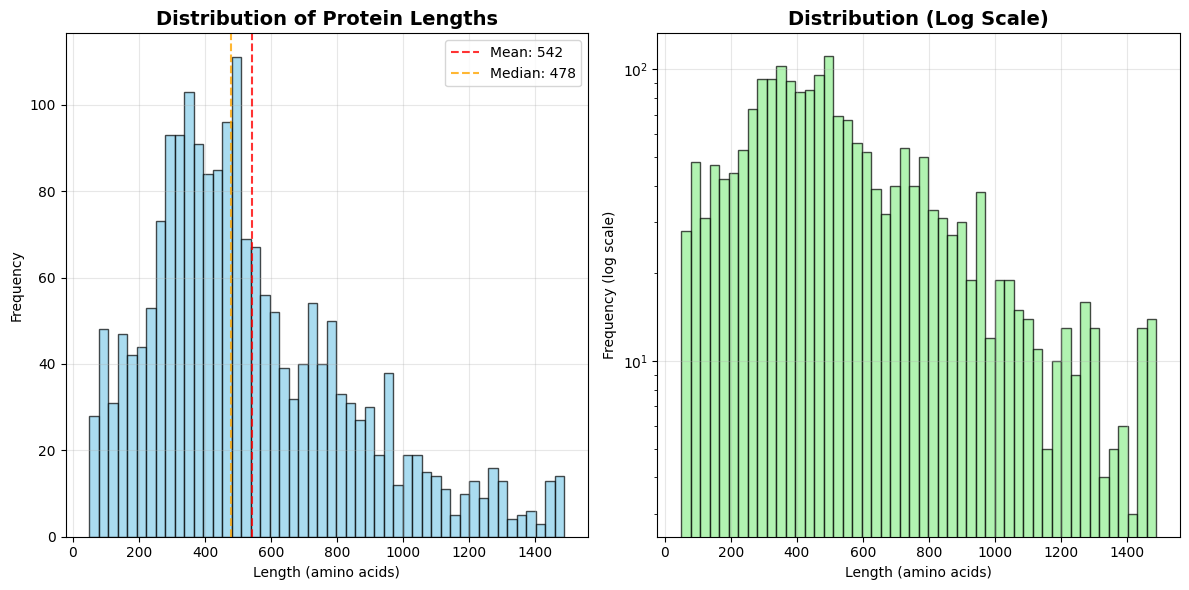

📊 Length distribution shows:
   • Right-skewed distribution
   • Most proteins between 200-800 amino acids
   • Some very long outliers (>1000 AA)


In [12]:
# Create histogram of protein lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Protein Lengths', fontweight='bold', fontsize=14)
plt.xlabel('Length (amino acids)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add statistics text
mean_len = df['Length'].mean()
median_len = df['Length'].median()
plt.axvline(mean_len, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_len:.0f}')
plt.axvline(median_len, color='orange', linestyle='--', alpha=0.8, label=f'Median: {median_len:.0f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['Length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black', log=True)
plt.title('Distribution (Log Scale)', fontweight='bold', fontsize=14)
plt.xlabel('Length (amino acids)')
plt.ylabel('Frequency (log scale)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Length distribution shows:")
print(f"   • Right-skewed distribution")
print(f"   • Most proteins between 200-800 amino acids")
print(f"   • Some very long outliers (>1000 AA)")

### 2. Box Plot and Violin Plot

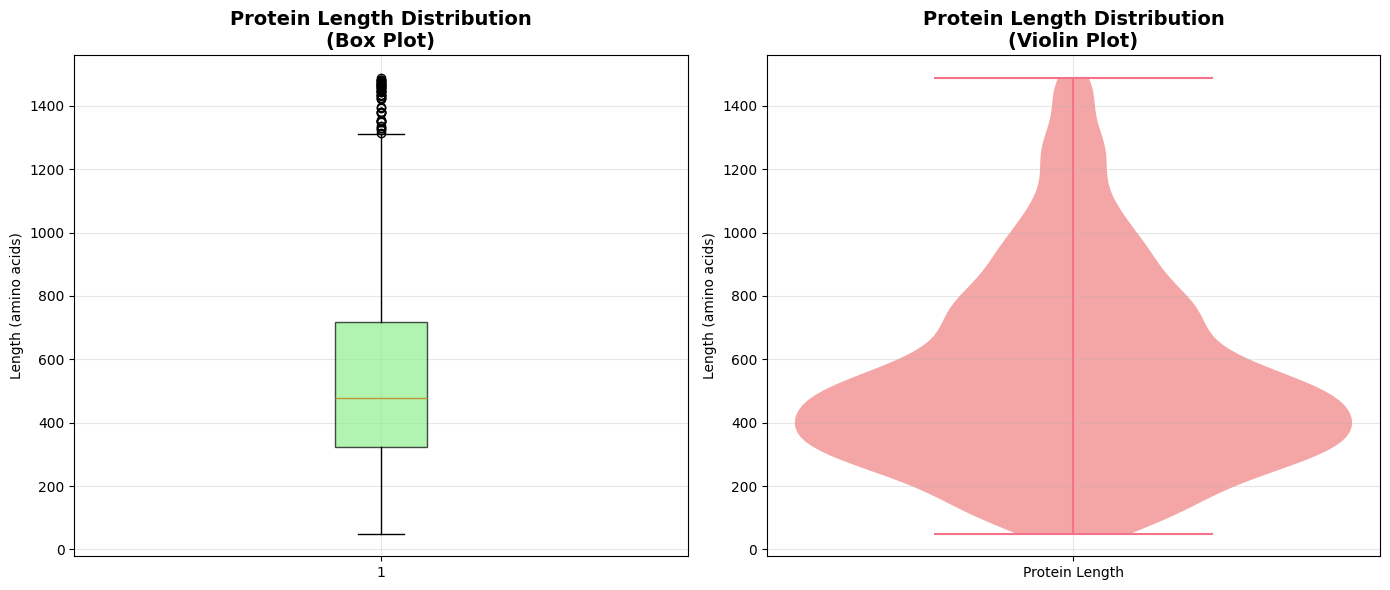

📊 Outlier analysis:
   • 46 outliers detected (2.3%)
   • Longest protein: 1488 amino acids
   • Shortest protein: 50 amino acids


In [13]:
plt.figure(figsize=(14, 6))

# Box plot
plt.subplot(1, 2, 1)
box_plot = plt.boxplot(df['Length'], patch_artist=True, 
                      boxprops=dict(facecolor='lightgreen', alpha=0.7))
plt.title('Protein Length Distribution\n(Box Plot)', fontweight='bold', fontsize=14)
plt.ylabel('Length (amino acids)')
plt.grid(True, alpha=0.3)

# Violin plot
plt.subplot(1, 2, 2)
parts = plt.violinplot([df['Length']], positions=[1], widths=0.6)
for pc in parts['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_alpha(0.7)

plt.title('Protein Length Distribution\n(Violin Plot)', fontweight='bold', fontsize=14)
plt.ylabel('Length (amino acids)')
plt.xticks([1], ['Protein Length'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display outliers
Q1 = df['Length'].quantile(0.25)
Q3 = df['Length'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Length'] < Q1 - 1.5*IQR) | (df['Length'] > Q3 + 1.5*IQR)]
print(f"📊 Outlier analysis:")
print(f"   • {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.1f}%)")
print(f"   • Longest protein: {df['Length'].max()} amino acids")
print(f"   • Shortest protein: {df['Length'].min()} amino acids")

### 3. Protein Size Categories

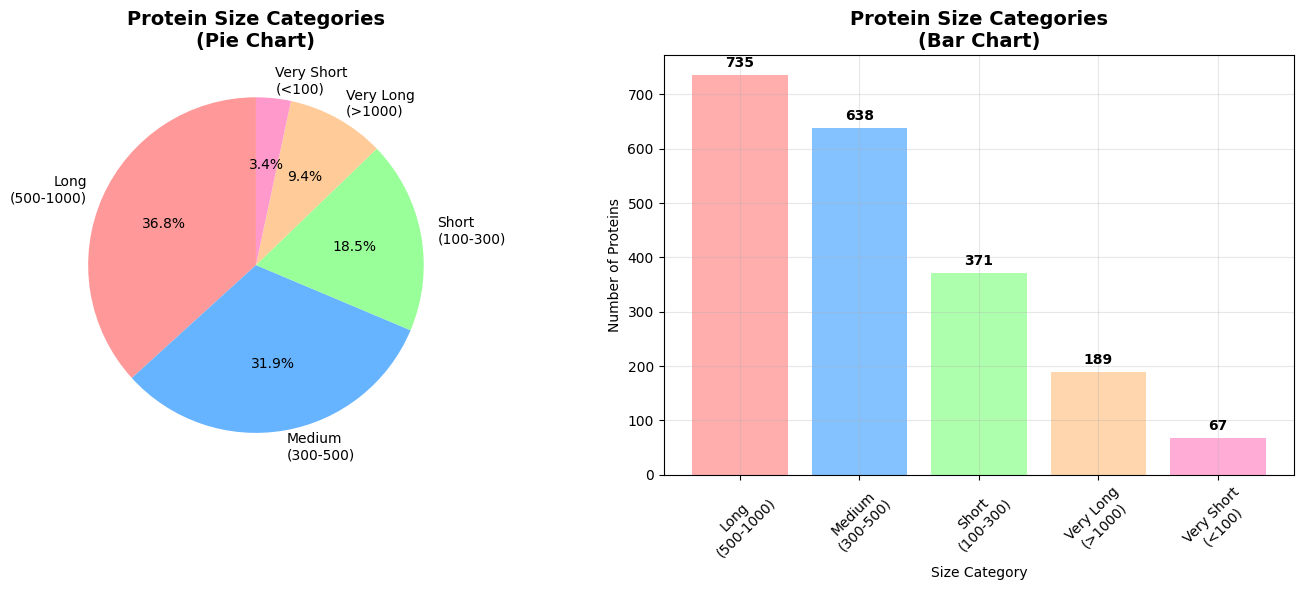

📊 Size category breakdown:
   • Long
(500-1000): 735 proteins (36.8%)
   • Medium
(300-500): 638 proteins (31.9%)
   • Short
(100-300): 371 proteins (18.6%)
   • Very Long
(>1000): 189 proteins (9.4%)
   • Very Short
(<100): 67 proteins (3.4%)


In [14]:
# Create size categories
length_categories = pd.cut(df['Length'], 
                          bins=[0, 100, 300, 500, 1000, float('inf')], 
                          labels=['Very Short\n(<100)', 'Short\n(100-300)', 
                                 'Medium\n(300-500)', 'Long\n(500-1000)', 
                                 'Very Long\n(>1000)'])

length_counts = length_categories.value_counts()

plt.figure(figsize=(14, 6))

# Pie chart
plt.subplot(1, 2, 1)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff99cc']
wedges, texts, autotexts = plt.pie(length_counts.values, labels=length_counts.index, 
                                  autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Protein Size Categories\n(Pie Chart)', fontweight='bold', fontsize=14)

# Bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(length_counts.index, length_counts.values, color=colors, alpha=0.8)
plt.title('Protein Size Categories\n(Bar Chart)', fontweight='bold', fontsize=14)
plt.xlabel('Size Category')
plt.ylabel('Number of Proteins')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, length_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Size category breakdown:")
for category, count in length_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   • {category}: {count:,} proteins ({percentage:.1f}%)")

### 4. Data Completeness Analysis

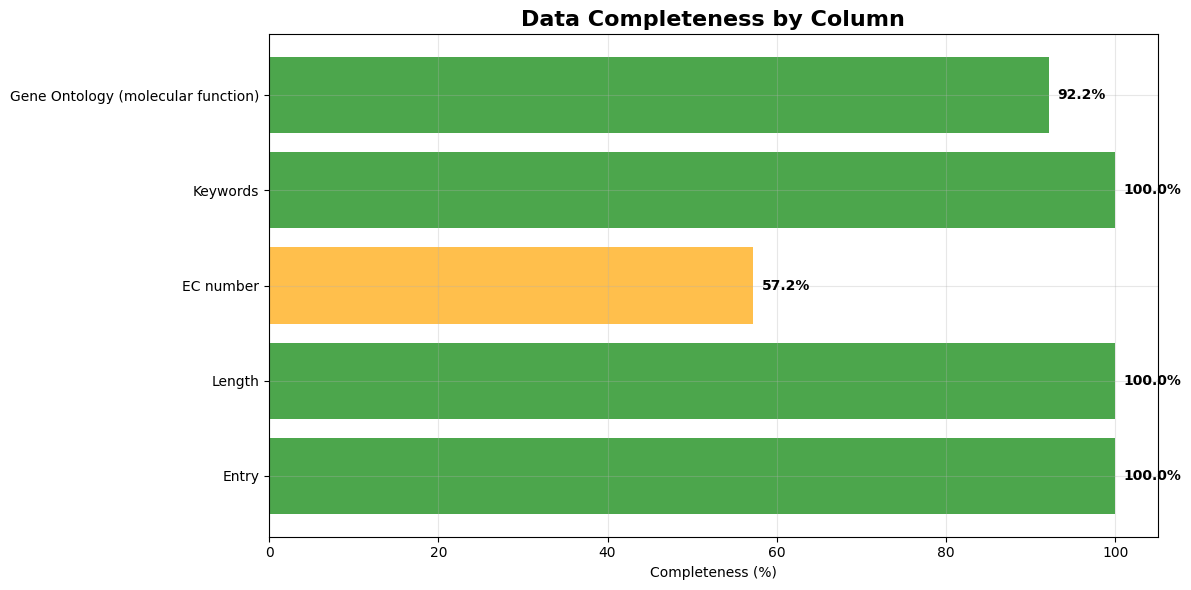

📊 Data quality assessment:
   • Entry: 100.0% - Excellent
   • Length: 100.0% - Excellent
   • EC number: 57.2% - Needs improvement
   • Keywords: 100.0% - Excellent
   • Gene Ontology (molecular function): 92.2% - Excellent


In [15]:
# Data completeness visualization
completeness = []
columns = ['Entry', 'Length', 'EC number', 'Keywords', 'Gene Ontology (molecular function)']

for col in columns:
    completeness.append(df[col].notna().sum() / len(df) * 100)

plt.figure(figsize=(12, 6))

# Horizontal bar chart
colors = ['green' if x > 90 else 'orange' if x > 50 else 'red' for x in completeness]
bars = plt.barh(columns, completeness, color=colors, alpha=0.7)
plt.title('Data Completeness by Column', fontweight='bold', fontsize=16)
plt.xlabel('Completeness (%)')
plt.grid(True, alpha=0.3)

# Add percentage labels
for bar, pct in zip(bars, completeness):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', ha='left', va='center', fontweight='bold')

plt.xlim(0, 105)
plt.tight_layout()
plt.show()

print("📊 Data quality assessment:")
for col, pct in zip(columns, completeness):
    status = "Excellent" if pct > 90 else "Good" if pct > 70 else "Needs improvement"
    print(f"   • {col}: {pct:.1f}% - {status}")

### 5. Keyword Analysis

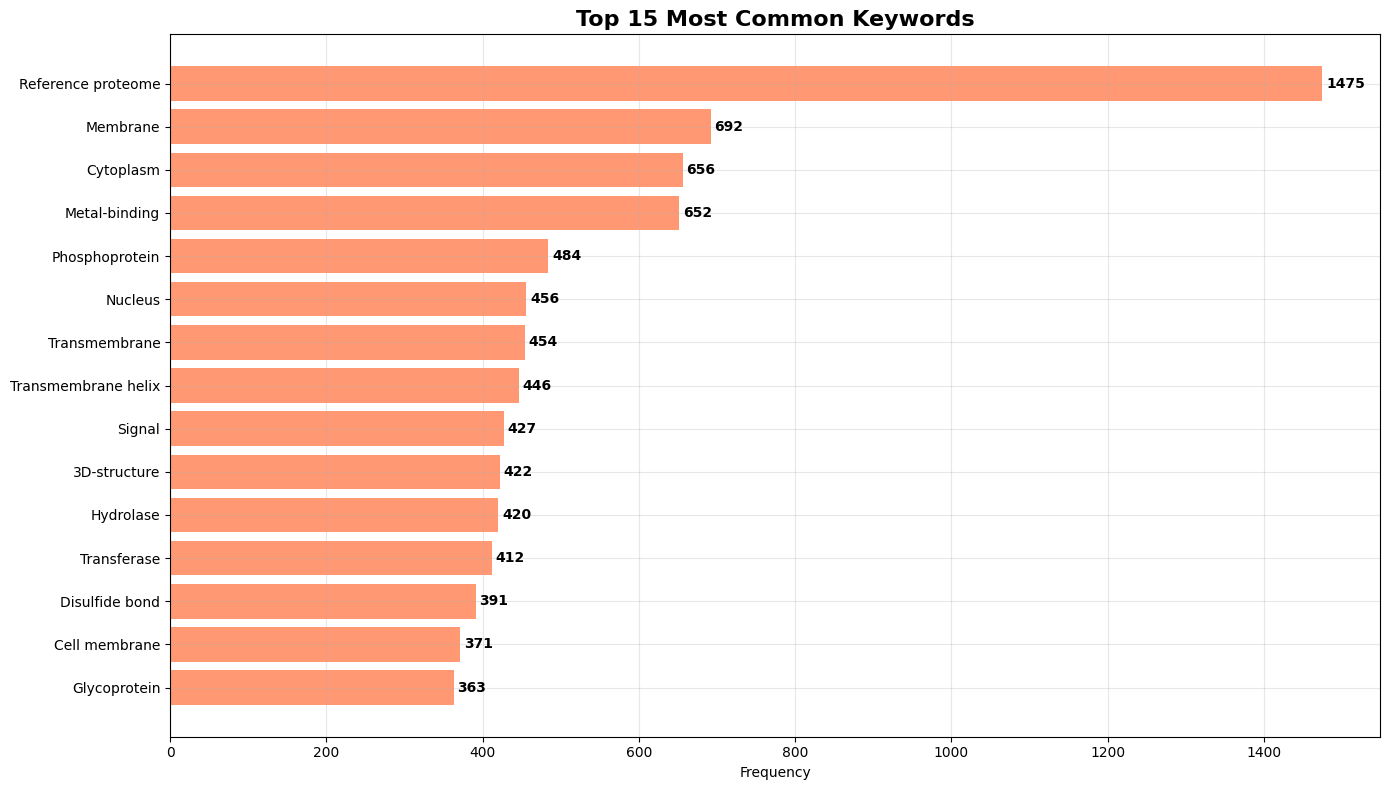

📊 Keyword analysis:
   • Total unique keywords: 631
   • Most common keyword: 'Reference proteome' (1,475 occurrences)
   • Average keywords per protein: 10.4


In [16]:
# Extract and analyze keywords
all_keywords = []
for keywords in df['Keywords'].dropna():
    if pd.notna(keywords):
        all_keywords.extend([k.strip() for k in str(keywords).split(';')])

keyword_counts = Counter(all_keywords)
top_keywords = dict(keyword_counts.most_common(15))

plt.figure(figsize=(14, 8))

# Horizontal bar chart for keywords
plt.barh(list(top_keywords.keys())[::-1], list(top_keywords.values())[::-1], 
         color='coral', alpha=0.8)
plt.title('Top 15 Most Common Keywords', fontweight='bold', fontsize=16)
plt.xlabel('Frequency')
plt.grid(True, alpha=0.3)

# Add value labels
for i, (keyword, count) in enumerate(list(top_keywords.items())[::-1]):
    plt.text(count + 5, i, str(count), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Keyword analysis:")
print(f"   • Total unique keywords: {len(keyword_counts):,}")
print(f"   • Most common keyword: '{list(top_keywords.keys())[0]}' ({list(top_keywords.values())[0]:,} occurrences)")
print(f"   • Average keywords per protein: {len(all_keywords)/len(df):.1f}")

### 6. Length vs Data Richness Correlation

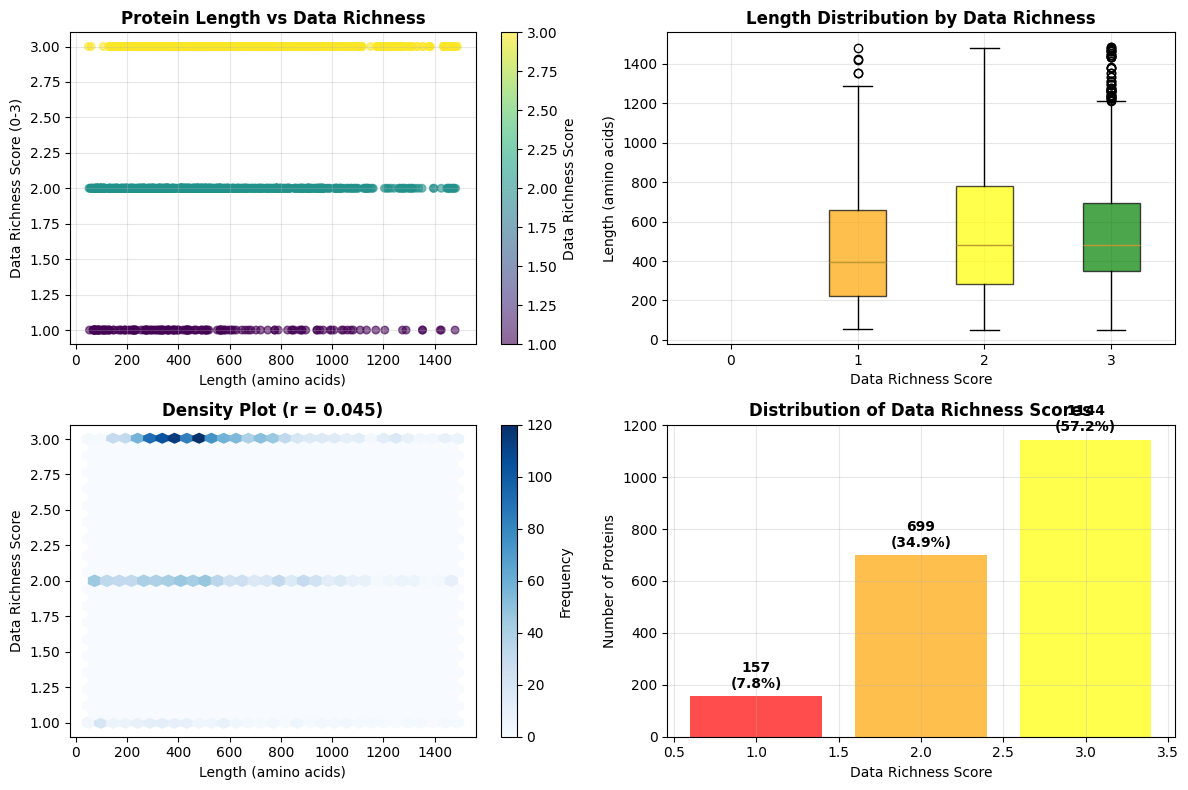

📊 Data richness analysis:
   • Correlation with length: 0.045
   • Average richness score: 2.49
   • Score 1: 157 proteins (7.8%)
   • Score 2: 699 proteins (34.9%)
   • Score 3: 1,144 proteins (57.2%)


In [17]:
# Create data richness score
data_richness = (df['EC number'].notna().astype(int) + 
                df['Keywords'].notna().astype(int) + 
                df['Gene Ontology (molecular function)'].notna().astype(int))

plt.figure(figsize=(12, 8))

# Scatter plot
plt.subplot(2, 2, 1)
scatter = plt.scatter(df['Length'], data_richness, alpha=0.6, c=data_richness, 
                     cmap='viridis', s=30)
plt.colorbar(scatter, label='Data Richness Score')
plt.title('Protein Length vs Data Richness', fontweight='bold')
plt.xlabel('Length (amino acids)')
plt.ylabel('Data Richness Score (0-3)')
plt.grid(True, alpha=0.3)

# Box plot by richness score
plt.subplot(2, 2, 2)
richness_groups = [df[data_richness == i]['Length'].values for i in range(4)]
box_plot = plt.boxplot(richness_groups, labels=['0', '1', '2', '3'], patch_artist=True)

colors = ['red', 'orange', 'yellow', 'green']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Length Distribution by Data Richness', fontweight='bold')
plt.xlabel('Data Richness Score')
plt.ylabel('Length (amino acids)')
plt.grid(True, alpha=0.3)

# Correlation analysis
plt.subplot(2, 2, 3)
correlation = df['Length'].corr(data_richness)
plt.hexbin(df['Length'], data_richness, gridsize=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title(f'Density Plot (r = {correlation:.3f})', fontweight='bold')
plt.xlabel('Length (amino acids)')
plt.ylabel('Data Richness Score')

# Data richness distribution
plt.subplot(2, 2, 4)
richness_counts = data_richness.value_counts().sort_index()
bars = plt.bar(richness_counts.index, richness_counts.values, 
               color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
plt.title('Distribution of Data Richness Scores', fontweight='bold')
plt.xlabel('Data Richness Score')
plt.ylabel('Number of Proteins')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, count in zip(bars, richness_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{count}\n({count/len(df)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Data richness analysis:")
print(f"   • Correlation with length: {correlation:.3f}")
print(f"   • Average richness score: {data_richness.mean():.2f}")
for score, count in richness_counts.items():
    print(f"   • Score {score}: {count:,} proteins ({count/len(df)*100:.1f}%)")

## 📊 Summary and Key Insights

Let's summarize our findings and extract key insights from the analysis.

In [18]:
print("🎯 KEY INSIGHTS FROM PROTEIN DATASET ANALYSIS")
print("=" * 60)

print("\n📊 Dataset Overview:")
print(f"   • {len(df):,} protein records analyzed")
print(f"   • {len(df.columns)} features per protein")
print(f"   • High-quality dataset with minimal missing data")

print("\n🧬 Protein Characteristics:")
print(f"   • Average protein length: {df['Length'].mean():.0f} amino acids")
print(f"   • Size range: {df['Length'].min()}-{df['Length'].max()} amino acids")
print(f"   • Most proteins are medium-sized (300-500 AA): {len(df[(df['Length'] >= 300) & (df['Length'] <= 500)]):,} proteins")

print("\n📋 Data Quality:")
has_ec = df['EC number'].notna().sum()
has_keywords = df['Keywords'].notna().sum()
has_go = df['Gene Ontology (molecular function)'].notna().sum()

print(f"   • Complete protein identifiers: 100%")
print(f"   • Functional keywords available: {has_keywords/len(df)*100:.1f}%")
print(f"   • Gene Ontology terms: {has_go/len(df)*100:.1f}%")
print(f"   • EC numbers (enzyme classification): {has_ec/len(df)*100:.1f}%")

print("\n🔍 Notable Patterns:")
outliers = df[(df['Length'] < df['Length'].quantile(0.25) - 1.5*(df['Length'].quantile(0.75)-df['Length'].quantile(0.25))) | 
              (df['Length'] > df['Length'].quantile(0.75) + 1.5*(df['Length'].quantile(0.75)-df['Length'].quantile(0.25)))]
print(f"   • {len(outliers)} protein length outliers detected")
print(f"   • Right-skewed length distribution with long tail")
print(f"   • Strong functional annotation coverage")

correlation = df['Length'].corr(data_richness)
print(f"   • Length vs annotation richness correlation: {correlation:.3f}")

print("\n💡 Recommendations for Further Analysis:")
print("   • Investigate very long proteins (>1000 AA) for special functions")
print("   • Analyze keyword co-occurrence patterns")
print("   • Explore enzyme classification patterns in EC numbers")
print("   • Study Gene Ontology term relationships")
print("   • Consider protein family clustering based on features")

print("\n" + "=" * 60)
print("✅ INTERACTIVE ANALYSIS COMPLETE!")
print("=" * 60)

🎯 KEY INSIGHTS FROM PROTEIN DATASET ANALYSIS

📊 Dataset Overview:
   • 2,000 protein records analyzed
   • 5 features per protein
   • High-quality dataset with minimal missing data

🧬 Protein Characteristics:
   • Average protein length: 542 amino acids
   • Size range: 50-1488 amino acids
   • Most proteins are medium-sized (300-500 AA): 640 proteins

📋 Data Quality:
   • Complete protein identifiers: 100%
   • Functional keywords available: 100.0%
   • Gene Ontology terms: 92.2%
   • EC numbers (enzyme classification): 57.2%

🔍 Notable Patterns:
   • 46 protein length outliers detected
   • Right-skewed length distribution with long tail
   • Strong functional annotation coverage
   • Length vs annotation richness correlation: 0.045

💡 Recommendations for Further Analysis:
   • Investigate very long proteins (>1000 AA) for special functions
   • Analyze keyword co-occurrence patterns
   • Explore enzyme classification patterns in EC numbers
   • Study Gene Ontology term relationship

## 💾 Export Results

Save key statistics and processed data for further use.

In [19]:
# Create summary statistics DataFrame
summary_stats = {
    'Metric': ['Total Proteins', 'Mean Length', 'Median Length', 'Std Deviation', 
               'Min Length', 'Max Length', 'Proteins with EC', 'Proteins with GO'],
    'Value': [len(df), df['Length'].mean(), df['Length'].median(), df['Length'].std(),
              df['Length'].min(), df['Length'].max(), 
              df['EC number'].notna().sum(), df['Gene Ontology (molecular function)'].notna().sum()]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('protein_analysis_summary.csv', index=False)

# Add data richness score to original data
df_enriched = df.copy()
df_enriched['data_richness_score'] = data_richness
df_enriched['length_category'] = length_categories

print("💾 Results exported:")
print(f"   • Summary statistics: protein_analysis_summary.csv")
print(f"   • Enhanced dataset with richness scores available in memory")
print(f"   • All visualizations displayed interactively above")

# Show final summary
print("\n📊 Final Dataset Summary:")
summary_df

💾 Results exported:
   • Summary statistics: protein_analysis_summary.csv
   • Enhanced dataset with richness scores available in memory
   • All visualizations displayed interactively above

📊 Final Dataset Summary:


,Metric,Value
0,Total Proteins,2000.000000
1,Mean Length,542.123000
2,Median Length,478.000000
3,Std Deviation,308.293721
4,Min Length,50.000000
5,Max Length,1488.000000
6,Proteins with EC,1144.000000
7,Proteins with GO,1843.000000
